# Loading Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
app_df = pd.read_csv("marketyard.csv")
app_df.head()


,AmcCode,AmcName,YardCode,YardName,CommCode,CommName,VarityCode,VarityName,Arrivals,Minimum,Maximum,Model
0,186,Adilabad,10,Adilabad,14,Bengal Gram,14,Common,0.0,0,0,0
1,186,Adilabad,10,Adilabad,14,Bengal Gram,14,Common,0.0,0,0,0
2,188,Bhainsa,11,Bhainsa,14,Bengal Gram,14,Common,0.0,0,0,0
3,193,Inderavally,15,Indravally,14,Bengal Gram,14,Common,0.0,0,0,0
4,197,Kubeer,29,Kubeer,14,Bengal Gram,14,Common,0.0,0,0,0


In [ ]:
app_df.shape


(20837, 12)

In [ ]:
app_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20837 entries, 0 to 20836
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AmcCode     20837 non-null  int64  
 1   AmcName     20837 non-null  object 
 2   YardCode    20837 non-null  int64  
 3   YardName    20837 non-null  object 
 4   CommCode    20837 non-null  int64  
 5   CommName    20837 non-null  object 
 6   VarityCode  20837 non-null  int64  
 7   VarityName  20837 non-null  object 
 8   Arrivals    20837 non-null  float64
 9   Minimum     20837 non-null  int64  
 10  Maximum     20837 non-null  int64  
 11  Model       20837 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.9+ MB


In [ ]:
app_df.describe()


,AmcCode,YardCode,CommCode,VarityCode,Arrivals,Minimum,Maximum,Model
count,20837.00000,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000
mean,267.51015,985.307770,22.808226,34.951912,149.479445,1398.902289,1794.110956,1659.977492
std,44.55291,503.652599,9.704631,50.061564,546.119271,1853.094795,2323.669025,2166.758828
min,186.00000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,229.00000,1067.000000,14.000000,14.000000,0.000000,0.000000,0.000000,0.000000
50%,279.00000,1138.000000,30.000000,30.000000,0.000000,0.000000,0.000000,0.000000
75%,306.00000,1332.000000,30.000000,30.000000,34.000000,3104.000000,4293.000000,3911.000000
max,368.00000,1629.000000,30.000000,243.000000,11804.000000,44330.000000,58469.000000,54656.000000


In [ ]:
app_df.isnull().sum()


AmcCode       0
AmcName       0
YardCode      0
YardName      0
CommCode      0
CommName      0
VarityCode    0
VarityName    0
Arrivals      0
Minimum       0
Maximum       0
Model         0
dtype: int64

# Exploratory Data Analysis (EDA)


In [ ]:
print(app_df)

       AmcCode            AmcName  YardCode  ... Minimum  Maximum Model
0          186           Adilabad        10  ...       0        0     0
1          186           Adilabad        10  ...       0        0     0
2          188            Bhainsa        11  ...       0        0     0
3          193        Inderavally        15  ...       0        0     0
4          197             Kubeer        29  ...       0        0     0
...        ...                ...       ...  ...     ...      ...   ...
20832      313  Ibrahimpatnam(RR)        42  ...       0        0     0
20833      315            Medchal        43  ...    1700     1700  1700
20834      315            Medchal        43  ...       0        0     0
20835      322           Chevella        46  ...       0        0     0
20836      246           Warangal       886  ...       0        0     0

[20837 rows x 12 columns]


# Visualization

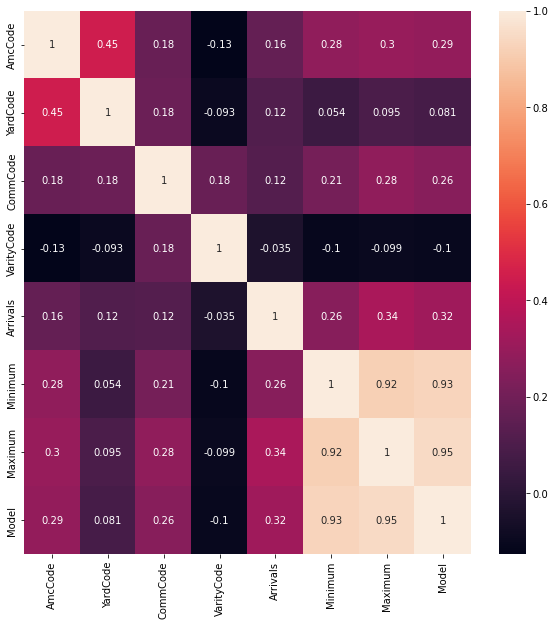

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(app_df.corr(), annot=True)
plt.show()


In [ ]:
app_df.isnull().sum()


AmcCode       0
AmcName       0
YardCode      0
YardName      0
CommCode      0
CommName      0
VarityCode    0
VarityName    0
Arrivals      0
Minimum       0
Maximum       0
Model         0
dtype: int64

In [ ]:
print((app_df['CommName']=='Bengal Gram').value_counts())

False    15932
True      4905
Name: CommName, dtype: int64


In [ ]:
print((app_df['CommName']=='Maize').value_counts())

False    17982
True      2855
Name: CommName, dtype: int64


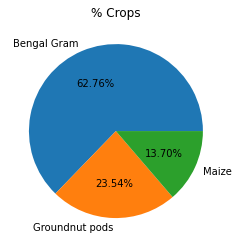

In [ ]:
#This shows Percentage of Crops in our dataset
plt.pie(app_df['CommName'].value_counts(), labels=['Bengal Gram', 'Groundnut pods','Maize'], autopct='%1.2f%%')
plt.title('% Crops')
plt.show()


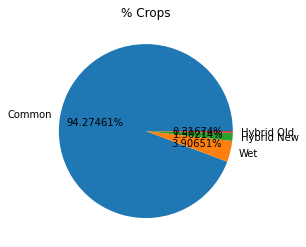

In [ ]:
#This shows Percentage of Crops in our dataset
plt.pie(app_df['VarityName'].value_counts(), labels=['Common','Wet','Hybrid New','Hybrid Old'], autopct='%0.5f%%')
plt.title('% Crops')
plt.show()


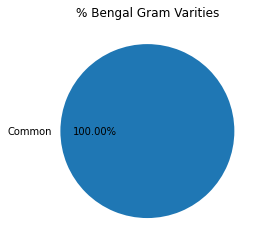

In [ ]:
#This shows Percentage of Crops in our dataset
plt.pie((app_df['VarityName']=='Bengal Gram').value_counts(), labels=['Common'], autopct='%1.2f%%')
plt.title('% Bengal Gram Varities')
plt.show()


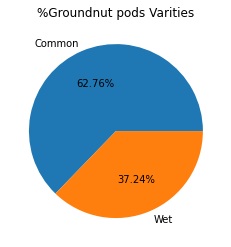

In [ ]:
#This shows Percentage of Crops in our dataset
plt.pie((app_df['CommName']=='Groundnut pods').value_counts(), labels=['Common','Wet'], autopct='%1.2f%%')
plt.title('%Groundnut pods Varities')
plt.show()



In [ ]:
print((app_df['CommName']=='Groundnut pods').value_counts())

True     13077
False     7760
Name: CommName, dtype: int64


# Feature Selection


In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in app_df:
    if app_df[col].dtypes=='object':
        app_df[col] = LE.fit_transform(app_df[col].astype(str))
app_df.head()

,AmcCode,AmcName,YardCode,YardName,CommCode,CommName,VarityCode,VarityName,Arrivals,Minimum,Maximum,Model
0,186,1,10,1,14,0,14,0,0.0,0,0,0
1,186,1,10,1,14,0,14,0,0.0,0,0,0
2,188,6,11,7,14,0,14,0,0.0,0,0,0
3,193,31,15,34,14,0,14,0,0.0,0,0,0
4,197,46,29,50,14,0,14,0,0.0,0,0,0


In [ ]:
#print(app_df)
app_df.corr()


,AmcCode,AmcName,YardCode,YardName,CommCode,CommName,VarityCode,VarityName,Arrivals,Minimum,Maximum,Model
AmcCode,1.000000,0.341746,0.446986,0.356060,0.176582,0.097088,-0.126016,-0.188377,0.164932,0.280369,0.300277,0.291312
AmcName,0.341746,1.000000,0.058058,0.988353,0.085261,0.058070,-0.128334,-0.173704,0.014108,0.197913,0.213234,0.204341
YardCode,0.446986,0.058058,1.000000,0.073623,0.184551,0.206038,-0.092749,-0.148500,0.115201,0.053916,0.094518,0.081071
YardName,0.356060,0.988353,0.073623,1.000000,0.091151,0.065849,-0.132696,-0.179371,0.010149,0.186033,0.201632,0.192624
CommCode,0.176582,0.085261,0.184551,0.091151,1.000000,-0.062718,0.176901,0.079427,0.123499,0.211256,0.278782,0.259174
CommName,0.097088,0.058070,0.206038,0.065849,-0.062718,1.000000,0.154261,0.096809,0.032830,-0.120409,-0.080034,-0.091702
VarityCode,-0.126016,-0.128334,-0.092749,-0.132696,0.176901,0.154261,1.000000,0.939885,-0.034640,-0.104847,-0.099391,-0.101340
VarityName,-0.188377,-0.173704,-0.148500,-0.179371,0.079427,0.096809,0.939885,1.000000,-0.059710,-0.145914,-0.152000,-0.150120
Arrivals,0.164932,0.014108,0.115201,0.010149,0.123499,0.032830,-0.034640,-0.059710,1.000000,0.257889,0.344759,0.322150
Minimum,0.280369,0.197913,0.053916,0.186033,0.211256,-0.120409,-0.104847,-0.145914,0.257889,1.000000,0.919050,0.929747


In [ ]:
features = app_df.drop(['CommName','Arrivals','YardName'], axis=1)
label = app_df['Model']

# Machine Learning Model

> Indented block




In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state = 10)

In [ ]:
#app_df.drop('DDate', axis=1, inplace=True)
#print(x_train, x_test, y_train, y_test )

In [ ]:
from xgboost import XGBRegressor

XGB_model = XGBRegressor()

XGB_model.fit(x_train, y_train)

print('XGBoost Model Accuracy : ', XGB_model.score(x_test, y_test)*100, '%')


[16:30:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Model Accuracy :  99.99601298436421 %
